<a href="https://colab.research.google.com/github/adityakhuman02/DAA_sem4/blob/main/exp2_for_ADV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

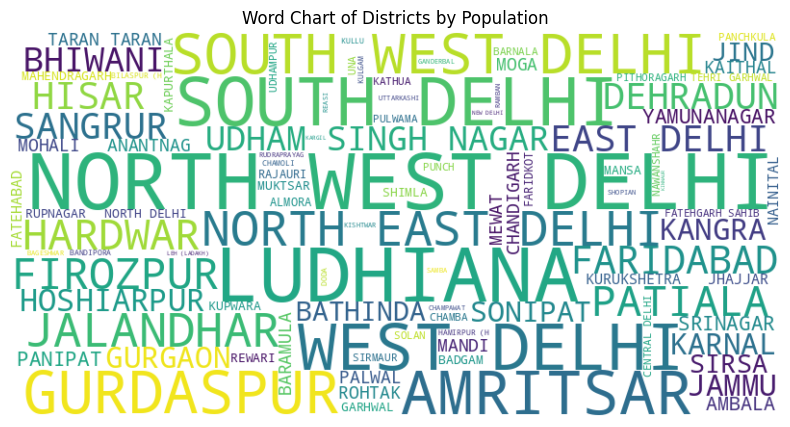

<ipython-input-5-36d0e88cef57>:33: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




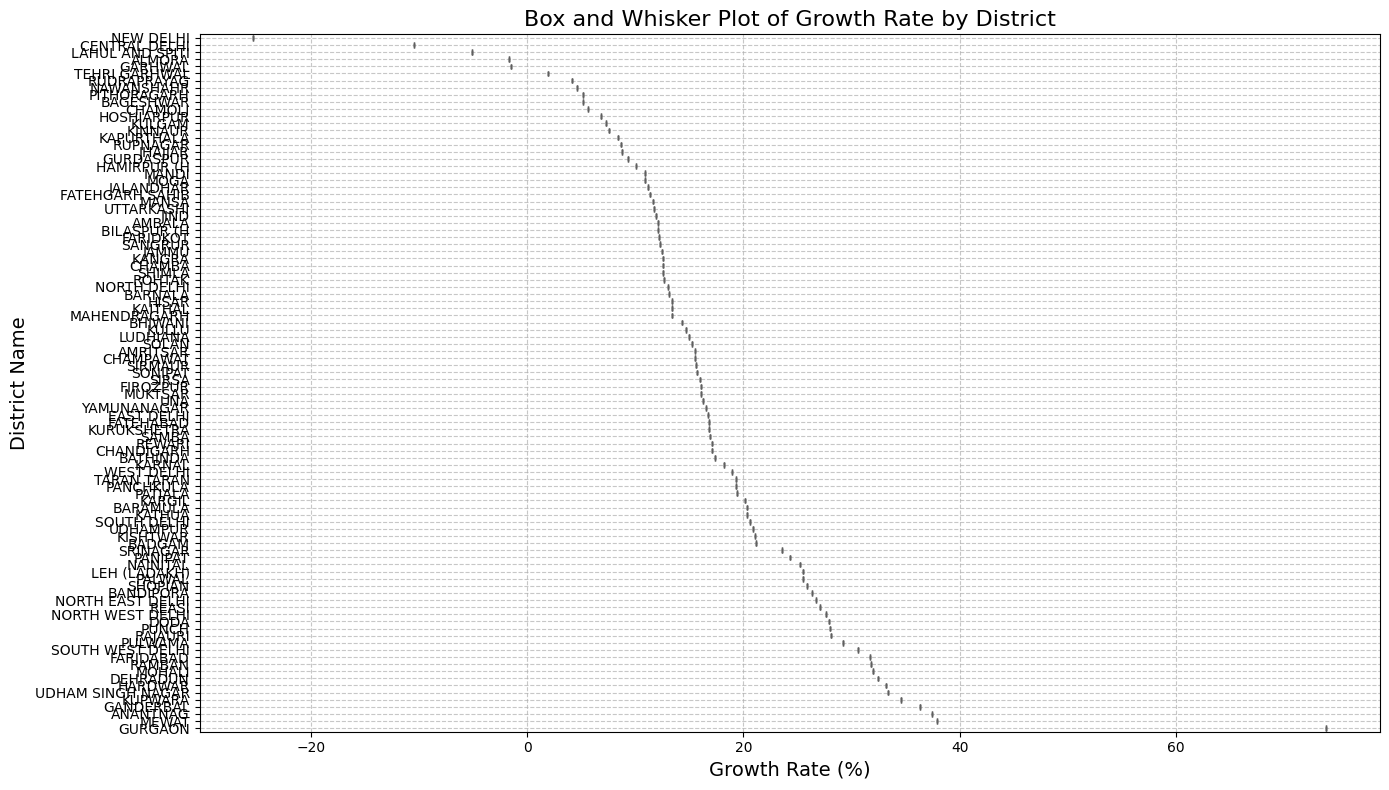

<ipython-input-5-36d0e88cef57>:48: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




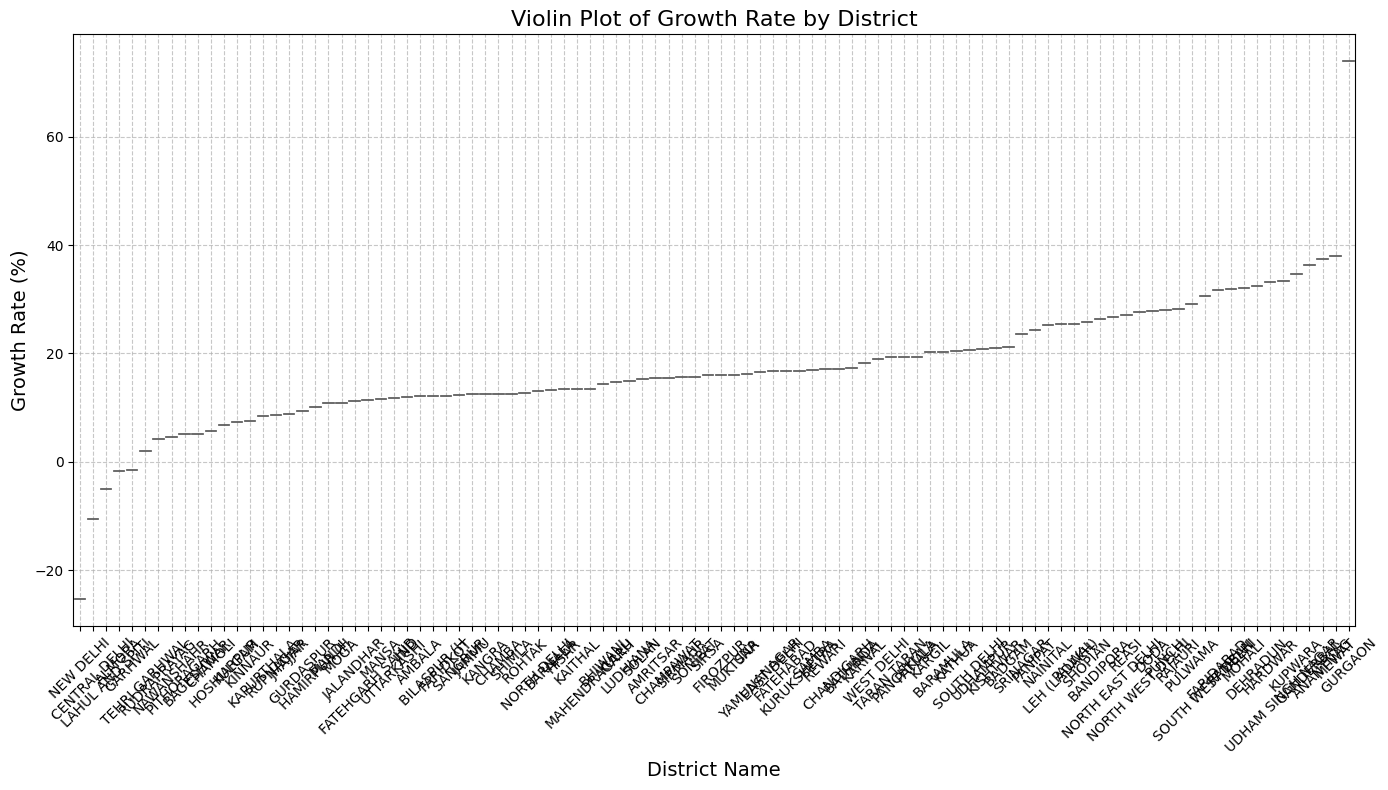

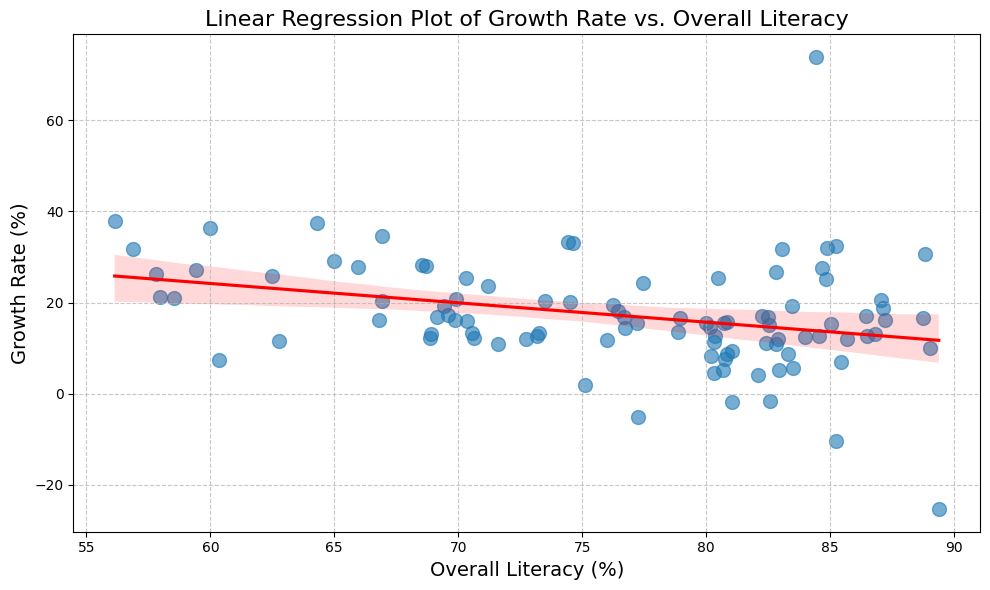

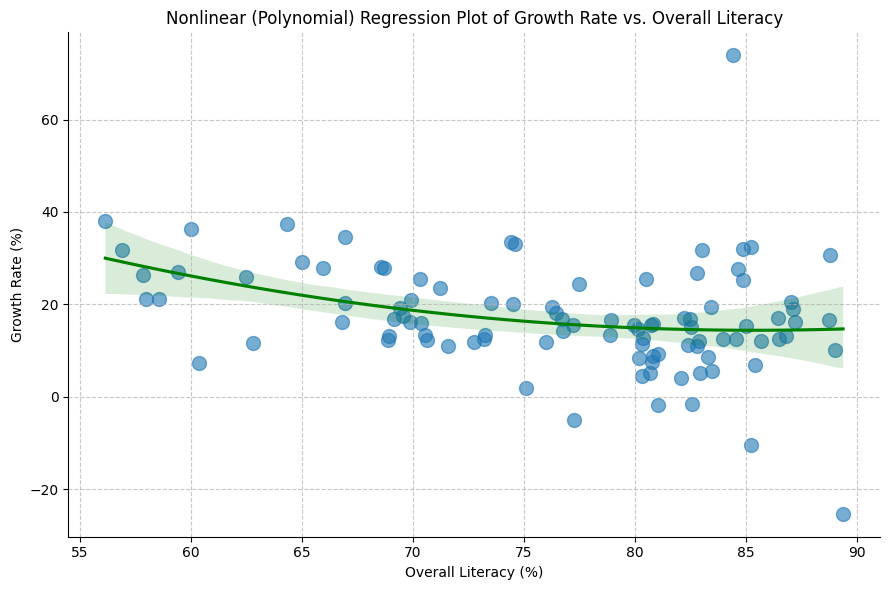

<ipython-input-5-36d0e88cef57>:94: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




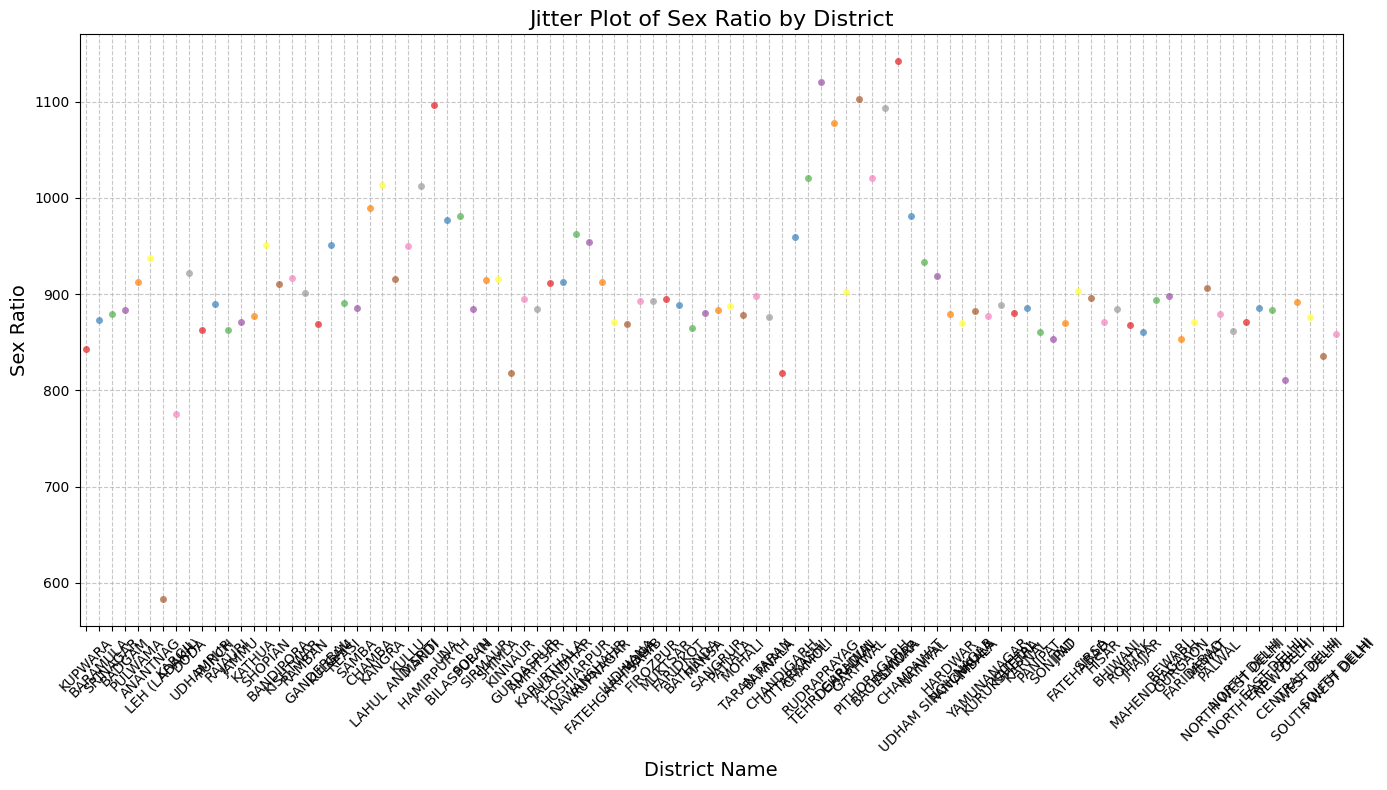

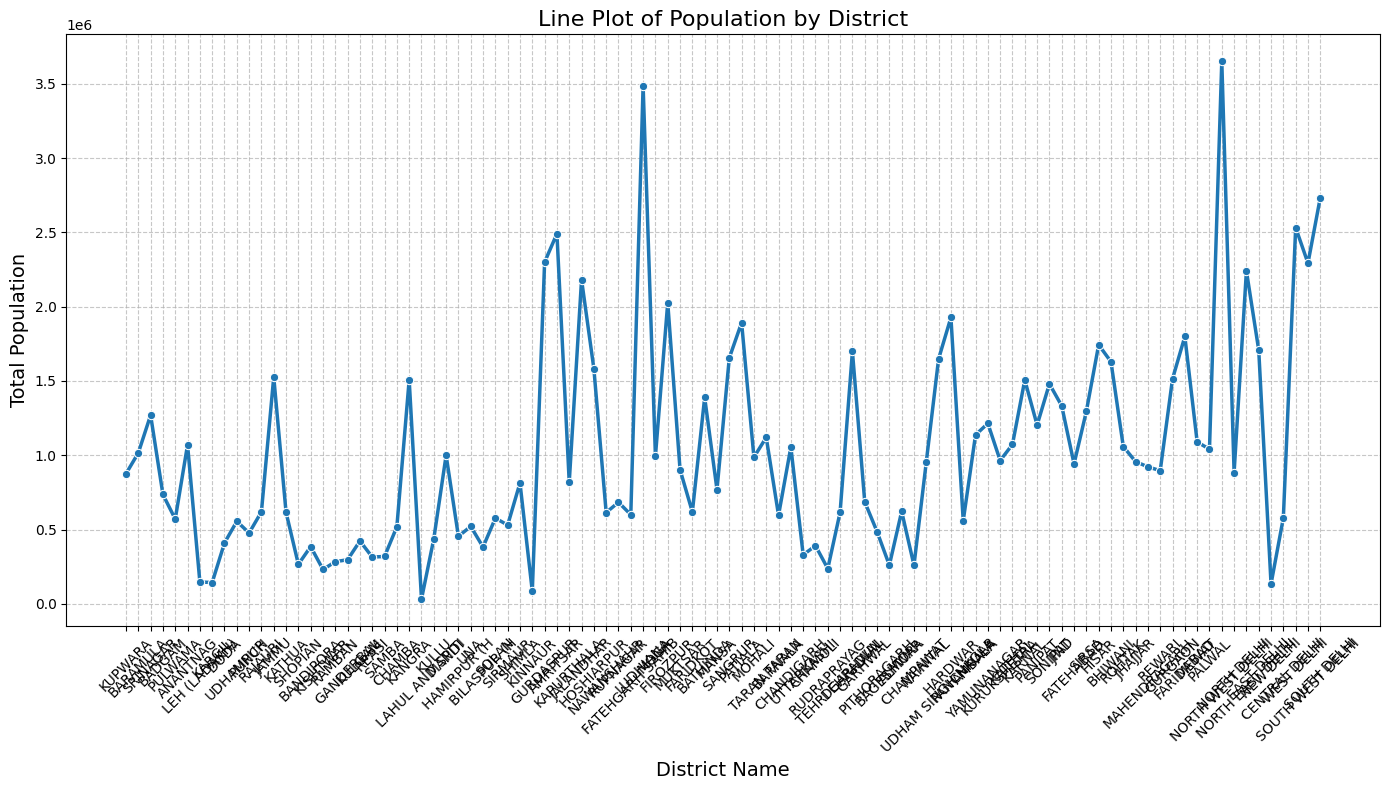

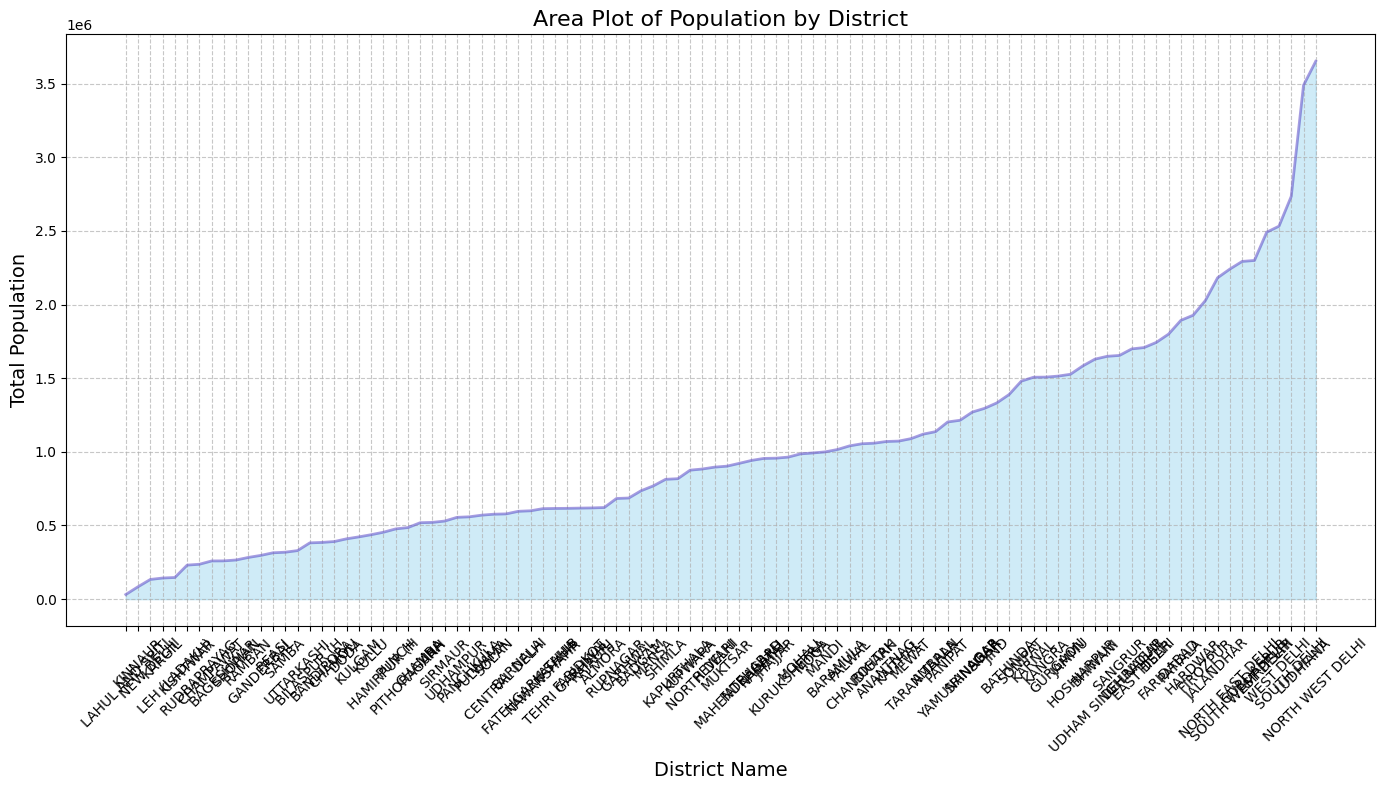

<ipython-input-5-36d0e88cef57>:133: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




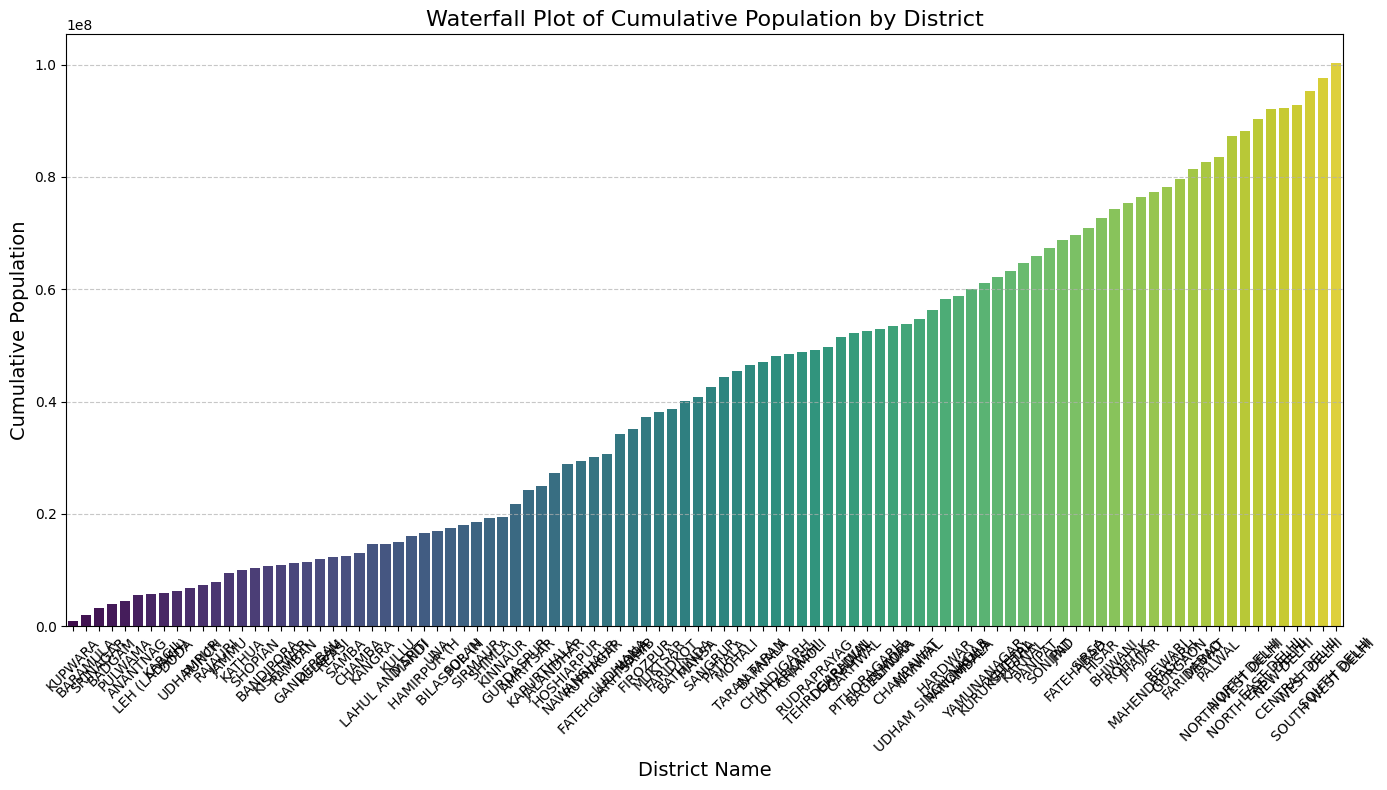

<function __main__.create_donut_chart(df)>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import plotly.express as px
import numpy as np

# Load the dataset (replace 'your_dataset.csv' with your actual file path)
df = pd.read_csv("/content/elementary_2015_16.csv")

# Select the first 100 rows
df = df.head(100)

# Handle NaN values in 'DISTRICT NAME' or 'TOTAL POULATION'
df = df.dropna(subset=['DISTRICT NAME', 'TOTAL POULATION'])  # Remove rows where these columns have NaN

# 1. Word Chart
def create_word_chart(df):
    word_freq = dict(zip(df['DISTRICT NAME'], df['TOTAL POULATION']))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title("Word Chart of Districts by Population")
    plt.show()

# 2. Enhanced Box and Whisker Plot
def create_enhanced_box_and_whisker(df):
    plt.figure(figsize=(14, 8))  # Increased figure size for better readability

    # Sort districts by median growth rate
    sorted_districts = df.groupby('DISTRICT NAME')['GROWTH RATE'].median().sort_values().index
    sns.boxplot(data=df, x='GROWTH RATE', y='DISTRICT NAME', order=sorted_districts, palette='Set3', showfliers=True)

    plt.title("Box and Whisker Plot of Growth Rate by District", fontsize=16)
    plt.xlabel("Growth Rate (%)", fontsize=14)
    plt.ylabel("District Name", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 3. Violin Plot
def create_violin_plot(df):
    # Sort districts by median growth rate
    sorted_districts = df.groupby('DISTRICT NAME')['GROWTH RATE'].median().sort_values().index

    plt.figure(figsize=(14, 8))
    sns.violinplot(data=df, y='GROWTH RATE', x='DISTRICT NAME', order=sorted_districts, palette='Set2')
    plt.title("Violin Plot of Growth Rate by District", fontsize=16)
    plt.xlabel("District Name", fontsize=14)
    plt.ylabel("Growth Rate (%)", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 4. Regression Plot (Linear and Nonlinear)
def create_regression_plot(df):
    plt.figure(figsize=(10, 6))
    sns.regplot(data=df, x='OVERALL LITERACY', y='GROWTH RATE', scatter_kws={'s': 100, 'alpha':0.6}, line_kws={'color': 'red'})
    plt.title("Linear Regression Plot of Growth Rate vs. Overall Literacy", fontsize=16)
    plt.xlabel("Overall Literacy (%)", fontsize=14)
    plt.ylabel("Growth Rate (%)", fontsize=14)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

    # Nonlinear (Polynomial) Regression Plot
    sns.lmplot(data=df, x='OVERALL LITERACY', y='GROWTH RATE', order=2, height=6, aspect=1.5, scatter_kws={'s': 100, 'alpha':0.6}, line_kws={'color': 'green'})
    plt.title("Nonlinear (Polynomial) Regression Plot of Growth Rate vs. Overall Literacy")
    plt.xlabel("Overall Literacy (%)")
    plt.ylabel("Growth Rate (%)")
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 5. 3D Scatter Plot
def create_3d_scatter_plot(df):
    fig = px.scatter_3d(df, x='DISTRICT NAME', y='OVERALL LITERACY', z='TOTAL POULATION',
                        color='GROWTH RATE', size='TOTAL POULATION',
                        title="3D Scatter Plot of Population, Literacy, and Growth Rate",
                        labels={
                            "DISTRICT NAME": "District Name",
                            "OVERALL LITERACY": "Overall Literacy (%)",
                            "TOTAL POULATION": "Total Population",
                            "GROWTH RATE": "Growth Rate (%)"
                        })
    fig.update_layout(margin=dict(l=0, r=0, b=0, t=50))
    fig.show()

# 6. Jitter Plot
def create_jitter_plot(df):
    plt.figure(figsize=(14, 8))
    sns.stripplot(data=df, x='DISTRICT NAME', y='SEX RATIO', jitter=True, palette='Set1', alpha=0.7)
    plt.title("Jitter Plot of Sex Ratio by District", fontsize=16)
    plt.xlabel("District Name", fontsize=14)
    plt.ylabel("Sex Ratio", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 7. Line Plot
def create_line_plot(df):
    plt.figure(figsize=(14, 8))
    sns.lineplot(data=df, x='DISTRICT NAME', y='TOTAL POULATION', marker='o', linewidth=2.5)
    plt.title("Line Plot of Population by District", fontsize=16)
    plt.xlabel("District Name", fontsize=14)
    plt.ylabel("Total Population", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 8. Area Plot
def create_area_plot(df):
    df_sorted = df.sort_values('TOTAL POULATION')
    plt.figure(figsize=(14, 8))
    plt.fill_between(df_sorted['DISTRICT NAME'], df_sorted['TOTAL POULATION'], color="skyblue", alpha=0.4)
    plt.plot(df_sorted['DISTRICT NAME'], df_sorted['TOTAL POULATION'], color="Slateblue", alpha=0.6, linewidth=2)
    plt.title("Area Plot of Population by District", fontsize=16)
    plt.xlabel("District Name", fontsize=14)
    plt.ylabel("Total Population", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 9. Waterfall Plot (using cumulative population change)
def create_waterfall_plot(df):
    df['Cumulative Population'] = df['TOTAL POULATION'].cumsum()
    plt.figure(figsize=(14, 8))
    sns.barplot(data=df, x='DISTRICT NAME', y='Cumulative Population', palette='viridis')
    plt.title("Waterfall Plot of Cumulative Population by District", fontsize=16)
    plt.xlabel("District Name", fontsize=14)
    plt.ylabel("Cumulative Population", fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(True, axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# 10. Donut Chart
def create_donut_chart(df):
    plt.figure(figsize=(10, 10))
    plt.pie(df['TOTAL POULATION'], labels=df['DISTRICT NAME'], autopct='%1.1f%%', startangle=140, pctdistance=0.85, colors=sns.color_palette('pastel'))
    center_circle = plt.Circle((0, 0), 0.70, fc='white')
    fig = plt.gcf()
    fig.gca().add_artist(center_circle)
    plt.title("Donut Chart of Population by District", fontsize=16)
    plt.show()

# 11. Treemap (using Plotly)
def create_treemap(df):
    fig = px.treemap(df, path=['DISTRICT NAME'], values='TOTAL POULATION',
                     title="Treemap of Population by District",
                     color='TOTAL POULATION', color_continuous_scale='Blues')
    fig.show()

# 12. Funnel Plot (Population by District)
def create_funnel_plot(df):
    fig = px.funnel(df, x='TOTAL POULATION', y='DISTRICT NAME',
                   title="Funnel Plot of Population by District",
                   labels={"TOTAL POULATION": "Total Population", "DISTRICT NAME": "District Name"})
    fig.show()

# Generate All Charts
create_word_chart(df)
create_enhanced_box_and_whisker(df)  # Updated Box Plot
create_violin_plot(df)
create_regression_plot(df)
create_3d_scatter_plot(df)
create_jitter_plot(df)
create_line_plot(df)
create_area_plot(df)
create_waterfall_plot(df)
create_donut_chart
